#📌 Extracción

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [41]:
df = pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [42]:
#Desarma los diccionarios de cada columna
df_datos = pd.json_normalize(df.to_dict(orient="records"), sep="_")

#Elimina los prefijos
df_datos.columns = df_datos.columns.str.replace(r'^(customer_|phone_|internet_|account_)', '', regex=True)

print(df_datos.head())

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

#🔧 Transformación

In [43]:
#Pantallazo general
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [44]:
#Descripcion rapida
df_datos.describe()

,SeniorCitizen,tenure,Charges_Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [45]:
#Datos unicos
for col in df_datos.columns:
    print(f"{col}: {df_datos[col].unique()}")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Cr

In [46]:
#Registros duplicados
df_datos.duplicated().sum()

np.int64(0)

In [47]:
#Duplicados en customerID
df_datos['customerID'].duplicated().sum()

np.int64(0)

In [48]:
#Tipos de datos
df_datos.dtypes

#Convertir posibles numéricos mal tipados
df_datos['Charges_Monthly'] = pd.to_numeric(df_datos['Charges_Monthly'], errors='coerce')

# Normalizar fechas (si existen columnas datetime)
if 'Fecha' in df_datos.columns:
    df_datos['Fecha'] = pd.to_datetime(df_datos['Fecha'], errors='coerce').dt.normalize()

In [49]:
for col in df_datos.select_dtypes(include='object'):
    print(f"{col}: {df_datos[col].unique()}")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges_Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [50]:
#Limpieza: bajar a minúsculas y quitar espacios
df_datos[col] = df_datos[col].str.strip().str.lower()

In [51]:
#Columna Cargos totales
print(df_datos['Charges_Total'].head(10))

#Tipos únicos
print(df_datos['Charges_Total'].unique())

print(df_datos['Charges_Monthly'].dtype)

#Reemplazar espacios vacíos por NaN
df_datos['Charges_Total'] = df_datos['Charges_Total'].replace(' ', np.nan)

#Convertir a float
#df_datos['Charges_Total'] = df_datos['Charges_Total'].astype(float)

#Verificar
print(df_datos['Charges_Total'].dtype)
print(df_datos['Charges_Total'].isna().sum())

0      593.3
1      542.4
2     280.85
3    1237.85
4      267.4
5     571.45
6    7904.25
7     5377.8
8     340.35
9     5957.9
Name: Charges_Total, dtype: object
['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']
float64
object
0


In [52]:
#Visualizacion de las filas que acompañan a datos nulos de Charges Total
df_datos[df_datos['Charges_Total'].isna()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total


In [53]:
# Reemplazar cadenas vacías por NaN
df_datos['Charges_Total'] = df_datos['Charges_Total'].replace('', np.nan)

# Rellenar NaN con 0
df_datos['Charges_Total'] = df_datos['Charges_Total'].fillna(0)

# Convertir a float
df_datos['Charges_Total'] = df_datos['Charges_Total'].astype(float)

df_datos.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [54]:
#Conversión de columnas numéricas
df_datos['SeniorCitizen'] = df_datos['SeniorCitizen'].astype(int)
df_datos['tenure'] = df_datos['tenure'].astype(int)
df_datos['Charges_Monthly'] = df_datos['Charges_Monthly'].astype(float)
df_datos['Charges_Total'] = df_datos['Charges_Total'].astype(float)

#Conversión de columnas categóricas
categorical_cols = [
    'Churn', 'gender', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for col in categorical_cols:
    df_datos[col] = df_datos[col].astype('category')

#Verificación final
print(df_datos.dtypes)


customerID            object
Churn               category
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
Charges_Monthly      float64
Charges_Total        float64
dtype: object


In [55]:
#Reemplazar valores especiales por "No"
replace_no = ['No phone service', 'No internet service']
binary_cols = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling'
]

for col in binary_cols:
    df_datos[col] = df_datos[col].replace(replace_no, 'No')

# Mapear Yes/No a 1/0
si_no_cols = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]
for col in si_no_cols:
    df_datos[col] = df_datos[col].map({'Yes': 'Si', 'No': 'No'})

# Mapear gender
df_datos['gender'] = df_datos['gender'].map({'Male': 'Hombre', 'Female': 'Mujer'})

# Mapear Contract
df_datos['Contract'] = df_datos['Contract'].map({
    'Month-to-month': 'Mensual',
    'One year': '1 año',
    'Two year': '2 años'
})

# Mapear PaymentMethod
df_datos['PaymentMethod'] = df_datos['PaymentMethod'].map({
    'Mailed check': 'Cheque',
    'Electronic check': 'Cheque electrónico',
    'Credit card (automatic)': 'Tarjeta de crédito (automático)',
    'Bank transfer (automatic)': 'Transferencia bancaria (automática)'
})

# Mapear Internet Service
df_datos['InternetService'] = df_datos['InternetService'].map({
    'DSL': 'DSL',
    'Fiber optic': 'Fibra óptica',
    'No': 'Sin servicio'
})

# Mapear Churn
df_datos['Churn'] = df_datos['Churn'].map({'Yes': 'Si', 'No': 'No'})

/tmp/ipython-input-1924307899.py:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_datos[col] = df_datos[col].replace(replace_no, 'No')


In [56]:
#Crear columna de facturación diaria
df_datos['Cuentas_Diarias'] = df_datos['Charges_Monthly'] / 30

#Verificar
df_datos[['Charges_Monthly', 'Cuentas_Diarias']].head()

,Charges_Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [57]:
# Diccionario de nombres en inglés -> español
nombres_columnas = {
    "customerID": "ID_Cliente",
    "gender": "Genero",
    "SeniorCitizen": "Ciudadano_Senior",
    "Partner": "Pareja",
    "Dependents": "Dependientes",
    "tenure": "Meses_Cliente",
    "PhoneService": "Servicio_Telefono",
    "MultipleLines": "Multiples_Lineas",
    "InternetService": "Servicio_Internet",
    "OnlineSecurity": "Seguridad_Online",
    "OnlineBackup": "Respaldo_Online",
    "DeviceProtection": "Proteccion_Dispositivo",
    "TechSupport": "Soporte_Tecnico",
    "StreamingTV": "Streaming_TV",
    "StreamingMovies": "Streaming_Peliculas",
    "Contract": "Contrato",
    "PaperlessBilling": "Factura_Sin_Papel",
    "PaymentMethod": "Metodo_Pago",
    "Charges_Monthly": "Charges_Mensuales",
    "TotalCharges": "Charges_Totales",
    "Churn": "Baja"
}

# Renombrar columnas
df_datos.rename(columns=nombres_columnas, inplace=True)

# Verificar
df_datos.head()


,ID_Cliente,Baja,Genero,Ciudadano_Senior,Pareja,Dependientes,Meses_Cliente,Servicio_Telefono,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Factura_Sin_Papel,Metodo_Pago,Charges_Mensuales,Charges_Total,Cuentas_Diarias
0,0002-ORFBO,No,Mujer,0,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,1 año,Si,Cheque,65.6,593.30,2.186667
1,0003-MKNFE,No,Hombre,0,No,No,9,Si,Si,DSL,...,No,No,No,Si,Mensual,No,Cheque,59.9,542.40,1.996667
2,0004-TLHLJ,Si,Hombre,0,No,No,4,Si,No,Fibra óptica,...,Si,No,No,No,Mensual,Si,Cheque electrónico,73.9,280.85,2.463333
3,0011-IGKFF,Si,Hombre,1,Si,No,13,Si,No,Fibra óptica,...,Si,No,Si,Si,Mensual,Si,Cheque electrónico,98.0,1237.85,3.266667
4,0013-EXCHZ,Si,Mujer,1,Si,No,3,Si,No,Fibra óptica,...,No,Si,Si,No,Mensual,Si,Cheque,83.9,267.40,2.796667


In [58]:
# Reemplazar valores vacíos o nulos en Baja por "No"
df_datos['Baja'] = df_datos['Baja'].replace('', 'No')
df_datos['Baja'] = df_datos['Baja'].fillna('No')

#📊 Carga y análisis

In [59]:
df_datos.describe()

,Ciudadano_Senior,Meses_Cliente,Charges_Mensuales,Charges_Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035,2.157337
std,0.369074,24.571773,30.129572,2268.648587,1.004319
min,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,35.425000,396.200000,1.180833
50%,0.000000,29.000000,70.300000,1389.200000,2.343333
75%,0.000000,55.000000,89.875000,3778.525000,2.995833
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [60]:
# Análisis descriptivo general
resumen = df_datos.describe().T  # Transpuesta para que sea más legible

# Añadir la mediana manualmente
resumen["Mediana"] = df_datos.median(numeric_only=True)

# Reordenar columnas para una vista más clara
resumen = resumen[["mean", "Mediana", "std", "min", "25%", "50%", "75%", "max"]]

# Renombrar encabezados a español
resumen.rename(columns={
    "mean": "Media",
    "std": "Desviacion_Estandar",
    "min": "Minimo",
    "25%": "Q1",
    "50%": "Q2",
    "75%": "Q3",
    "max": "Maximo"
}, inplace=True)

resumen

,Media,Mediana,Desviacion_Estandar,Minimo,Q1,Q2,Q3,Maximo
Ciudadano_Senior,0.162653,0.000000,0.369074,0.000000,0.000000,0.000000,0.000000,1.000000
Meses_Cliente,32.346498,29.000000,24.571773,0.000000,9.000000,29.000000,55.000000,72.000000
Charges_Mensuales,64.720098,70.300000,30.129572,18.250000,35.425000,70.300000,89.875000,118.750000
Charges_Total,2277.182035,1389.200000,2268.648587,0.000000,396.200000,1389.200000,3778.525000,8684.800000
Cuentas_Diarias,2.157337,2.343333,1.004319,0.608333,1.180833,2.343333,2.995833,3.958333


##Distribución de Evasión

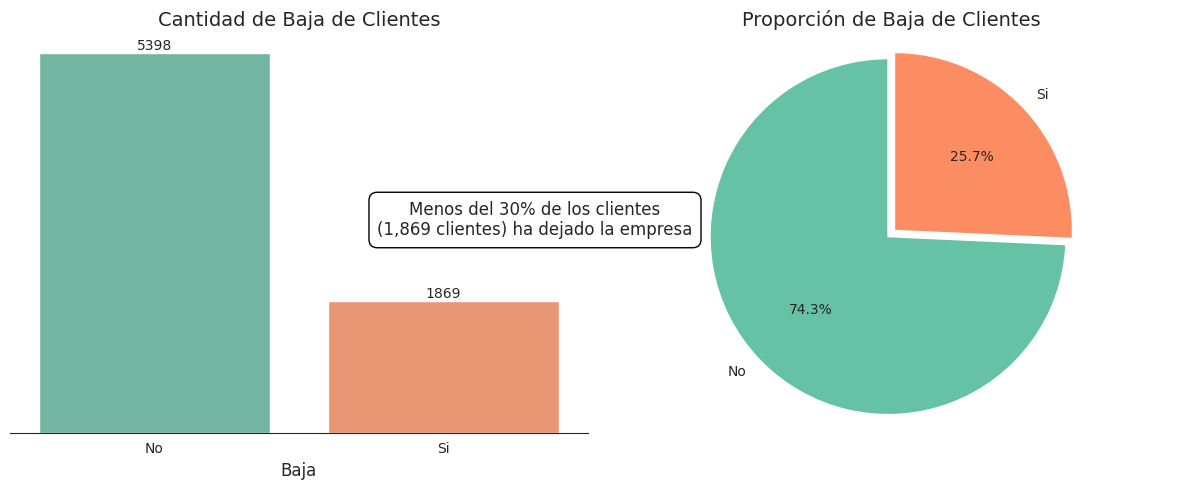

In [61]:
# Crear figura y ejes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Gráfico de barras ---
sns.countplot(
    data=df_datos,
    x="Baja",
    hue="Baja",
    palette=["#66c2a5", "#fc8d62"],
    legend=False,
    ax=axes[0]
)
axes[0].set_title("Cantidad de Baja de Clientes", fontsize=14)
axes[0].set_xlabel("Baja", fontsize=12)
axes[0].set_ylabel("")
axes[0].yaxis.set_visible(False)
axes[0].grid(False)
sns.despine(ax=axes[0], left=True)

# Agregar valores encima de cada barra
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{int(height)}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10)

# --- Gráfico de torta ---
conteo = df_datos["Baja"].value_counts()
axes[1].pie(
    conteo,
    labels=conteo.index,
    autopct='%1.1f%%',
    colors=["#66c2a5", "#fc8d62"],
    startangle=90,
    explode=(0, 0.05)
)
axes[1].set_title("Proporción de Baja de Clientes", fontsize=14)
axes[1].axis('equal')

# --- Mini conclusión ---
total_clientes = len(df_datos)
clientes_baja = conteo["Si"]
porcentaje_baja = (clientes_baja / total_clientes) * 100

texto_conclusion = (
    f"Menos del 30% de los clientes\n"
    f"({clientes_baja:,} clientes) ha dejado la empresa"
)

# Coordenadas en la figura (relativas, no de datos)
fig.text(
    0.45, 0.55, texto_conclusion,
    ha="center", va="center", fontsize=12,
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.5")
)

plt.tight_layout()
plt.show()

##Recuento de Evasión por variables

###Distribucion por Genero

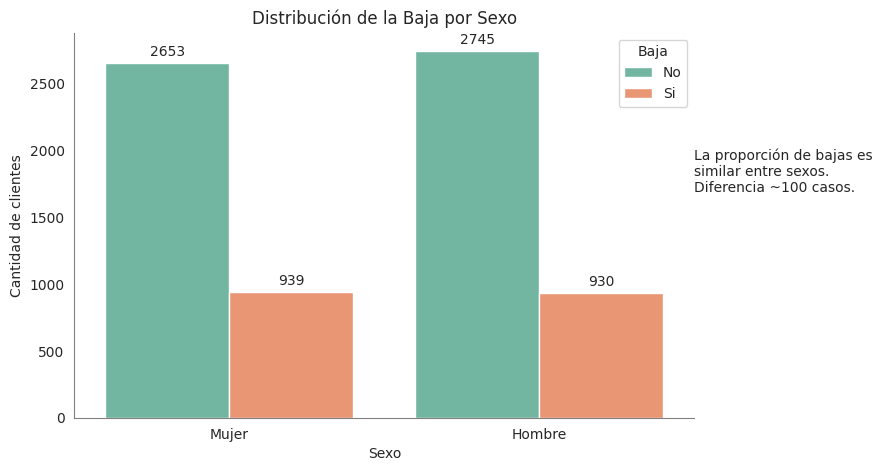

In [68]:
plt.figure(figsize=(8,5))
ax = sns.countplot(
    data=df_datos,
    x='Genero',
    hue='Baja',
    palette=['#66c2a5','#fc8d62']
)

plt.title('Distribución de la Baja por Sexo')
plt.ylabel('Cantidad de clientes')
plt.xlabel('Sexo')
plt.legend(title='Baja')


# Quitar bordes superior y derecho
sns.despine(top=True, right=True)

# Hacer más claros los ejes izquierdo e inferior
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

# Agregar etiquetas encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)


# Texto con resumen a la derecha
texto_resumen = (
    "La proporción de bajas es\n"
    "similar entre sexos.\n"
    "Diferencia ~100 casos."
)
ax.text(
    1.5,                                # Posición X (afuera del último grupo)
    ax.get_ylim()[1] * 0.7,             # Posición Y (altura relativa)
    texto_resumen,
    fontsize=10,
    va='top'
)

plt.show()

###Distribución de la Baja por tipo de contrato

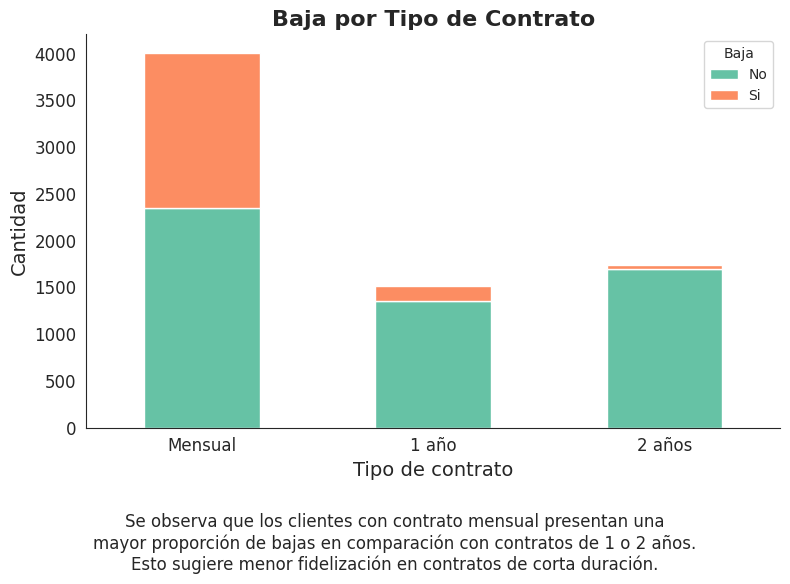

In [63]:
contract_counts = (
    df_datos.groupby(['Contrato', 'Baja'], observed=False)
    .size()
    .unstack(fill_value=0)
)

ax1 = contract_counts.plot(
    kind='bar',
    stacked=True,
    color=palette,
    figsize=(8, 5)
)

ax1.set_title('Baja por Tipo de Contrato', fontsize=16, fontweight='bold')
ax1.set_xlabel('Tipo de contrato', fontsize=14)
ax1.set_ylabel('Cantidad', fontsize=14)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
sns.despine(ax=ax1, top=True, right=True)

# Cuadro de texto interpretativo
texto1 = (
    "Se observa que los clientes con contrato mensual presentan una\n"
    "mayor proporción de bajas en comparación con contratos de 1 o 2 años.\n"
    "Esto sugiere menor fidelización en contratos de corta duración."
)
plt.gcf().text(0.5, -0.15, texto1, ha='center', fontsize=12)

plt.tight_layout()
plt.show()

###Distribucion de la baja por metodo de pago

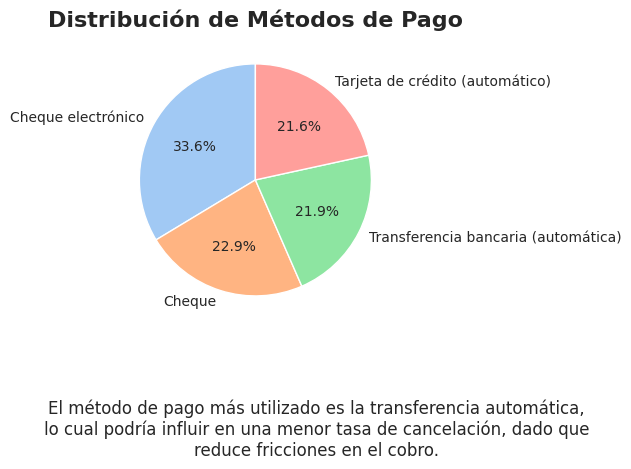

In [65]:
payment_counts = df_datos.Metodo_Pago.value_counts()

fig, ax2 = plt.subplots(figsize=(6, 6))
ax2.pie(
    payment_counts,
    labels=payment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel"),
    textprops={'fontsize': 10}
)
ax2.set_title('Distribución de Métodos de Pago', fontsize=16, fontweight='bold')

# Cuadro de texto interpretativo
texto2 = (
    "El método de pago más utilizado es la transferencia automática,\n"
    "lo cual podría influir en una menor tasa de cancelación, dado que\n"
    "reduce fricciones en el cobro."
)
plt.gcf().text(0.5, 0.02, texto2, ha='center', fontsize=12)

plt.tight_layout()
plt.show()

###Distribucion de baja por tipo de servicio de internet

/tmp/ipython-input-626301381.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  internet_counts = df_datos.groupby(['Servicio_Internet', 'Baja']).size().unstack(fill_value=0)


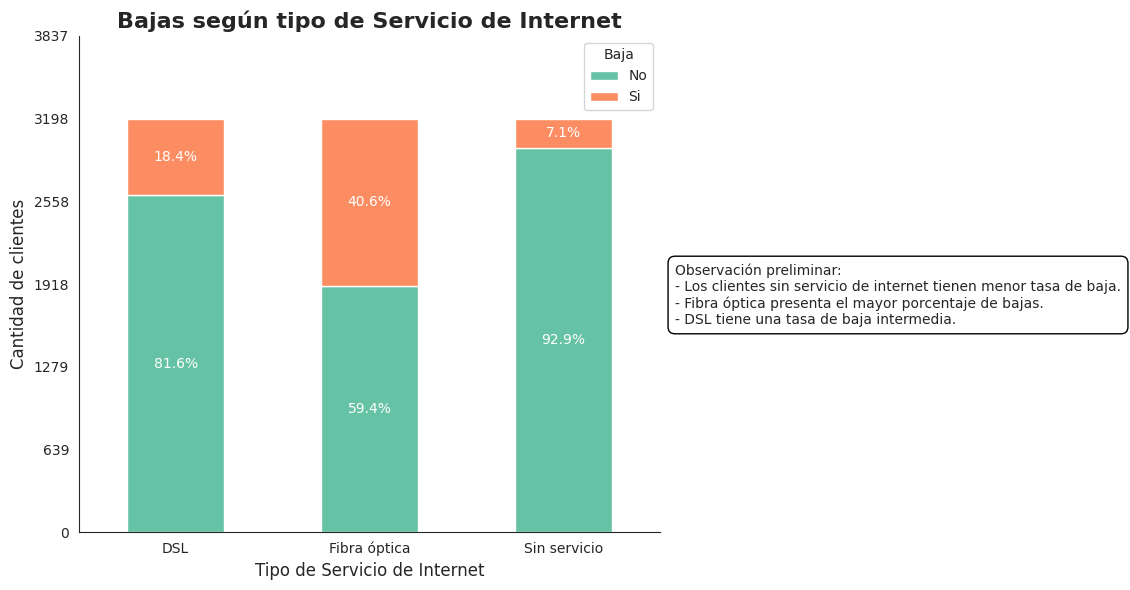

In [83]:
# Contar bajas y no bajas por tipo de servicio de internet
internet_counts = df_datos.groupby(['Servicio_Internet', 'Baja']).size().unstack(fill_value=0)

# Calcular proporciones
internet_prop = internet_counts.div(internet_counts.sum(axis=1), axis=0) * 100

# Colores para "No" y "Sí"
colors = ['#66c2a5', '#fc8d62']

# Crear figura
fig, ax = plt.subplots(figsize=(8, 6))

# Gráfico de barras apiladas con porcentajes
internet_prop.plot(kind='bar', stacked=True, color=colors, ax=ax)

# Rotar etiquetas eje X
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Eliminar borde superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Eje izquierdo: mostrar cantidades reales
ax.set_yticks(ax.get_yticks())  # mantener posiciones
ax.set_yticklabels([int(val * internet_counts.sum(axis=1).max() / 100) for val in ax.get_yticks()])

ax.set_title('Bajas según tipo de Servicio de Internet', fontsize=16, fontweight='bold')
ax.set_xlabel('Tipo de Servicio de Internet', fontsize=12)
ax.set_ylabel('Cantidad de clientes', fontsize=12)
ax.legend(title='Baja', fontsize=10)

# Agregar porcentajes dentro de las barras
for i, (index, row) in enumerate(internet_prop.iterrows()):
    ax.text(i, row['No'] / 2, f"{row['No']:.1f}%", ha='center', va='center', color='white', fontsize=10)
    ax.text(i, row['No'] + row['Si'] / 2, f"{row['Si']:.1f}%", ha='center', va='center', color='white', fontsize=10)

# Cuadro de texto con mini conclusión
texto = (
    "Observación preliminar:\n"
    "- Los clientes sin servicio de internet tienen menor tasa de baja.\n"
    "- Fibra óptica presenta el mayor porcentaje de bajas.\n"
    "- DSL tiene una tasa de baja intermedia."
)
plt.gcf().text(0.85, 0.5, texto, fontsize=10, va='center', ha='left',
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


###Distribucion de baja segun cantidad de lineas y cuentas diarias

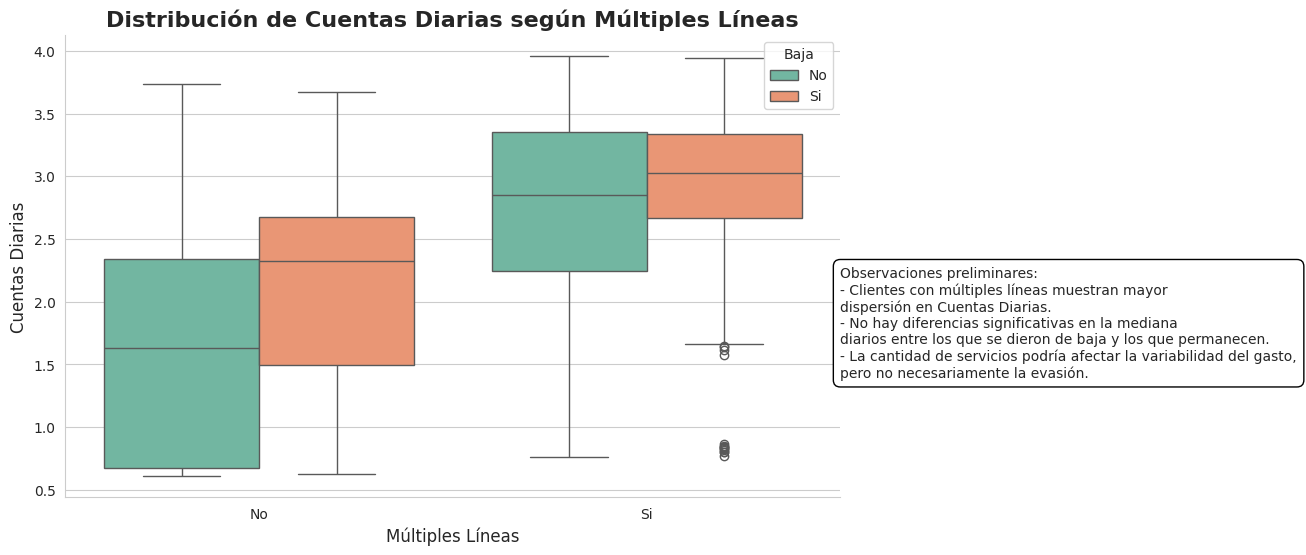

In [94]:
sns.set_style("whitegrid")
palette = ['#66c2a5', '#fc8d62']

plt.figure(figsize=(10,6))

# Boxplot
ax = sns.boxplot(
    data=df_datos,
    x='Multiples_Lineas',
    y='Cuentas_Diarias',
    hue='Baja',
    palette=palette
)

# Títulos y etiquetas
ax.set_title('Distribución de Cuentas Diarias según Múltiples Líneas', fontsize=16, fontweight='bold')
ax.set_xlabel('Múltiples Líneas', fontsize=12)
ax.set_ylabel('Cuentas Diarias', fontsize=12)

# Ajustar leyenda
ax.legend(title='Baja')

# Eliminar borde superior y derecho
sns.despine(top=True, right=True)

# Agregar cuadro de texto con preconclusión
texto = (
    "Observaciones preliminares:\n"
    "- Clientes con múltiples líneas muestran mayor\n"
    "dispersión en Cuentas Diarias.\n"
    "- No hay diferencias significativas en la mediana\n"
    "diarios entre los que se dieron de baja y los que permanecen.\n"
    "- La cantidad de servicios podría afectar la variabilidad del gasto,\n"
    "pero no necesariamente la evasión."
)

plt.gcf().text(
    0.9, 0.4, texto, fontsize=10, va='center', ha='left',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)

plt.show()

###Distribucion de Gastos Totales según Baja

/tmp/ipython-input-3125900129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


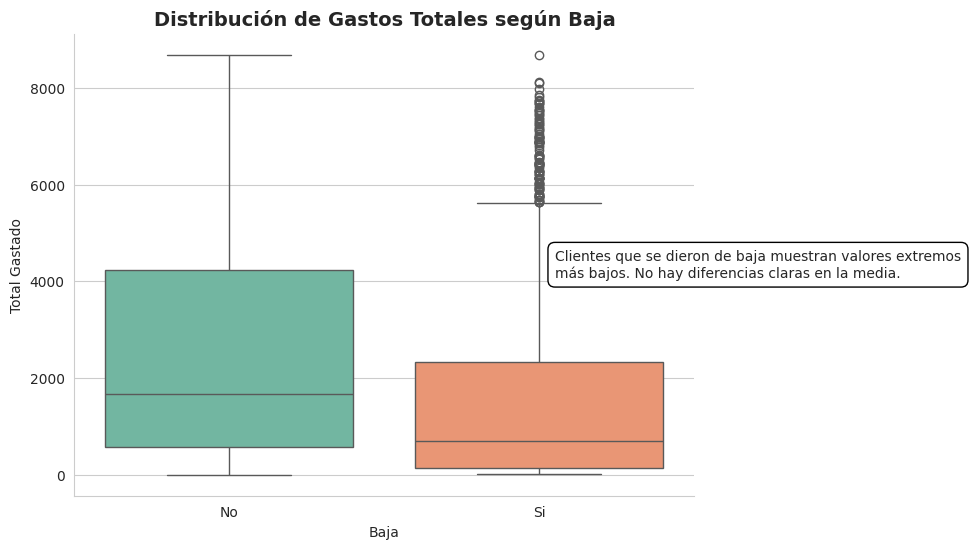

In [100]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df_datos,
    x='Baja',
    y='Charges_Total',
    palette=['#66c2a5', '#fc8d62']
)
plt.title('Distribución de Gastos Totales según Baja', fontsize=14, fontweight='bold')
plt.xlabel('Baja')
plt.ylabel('Total Gastado')
sns.despine(top=True, right=True)
plt.text(
    1.05, df_datos['Charges_Total'].max()*0.5,
    "Clientes que se dieron de baja muestran valores extremos"
    "\nmás bajos. No hay diferencias claras en la media.",
    fontsize=10, va='center', ha='left',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)
plt.show()

###Distribución de Meses de Contrato según Baja

/tmp/ipython-input-3506456801.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


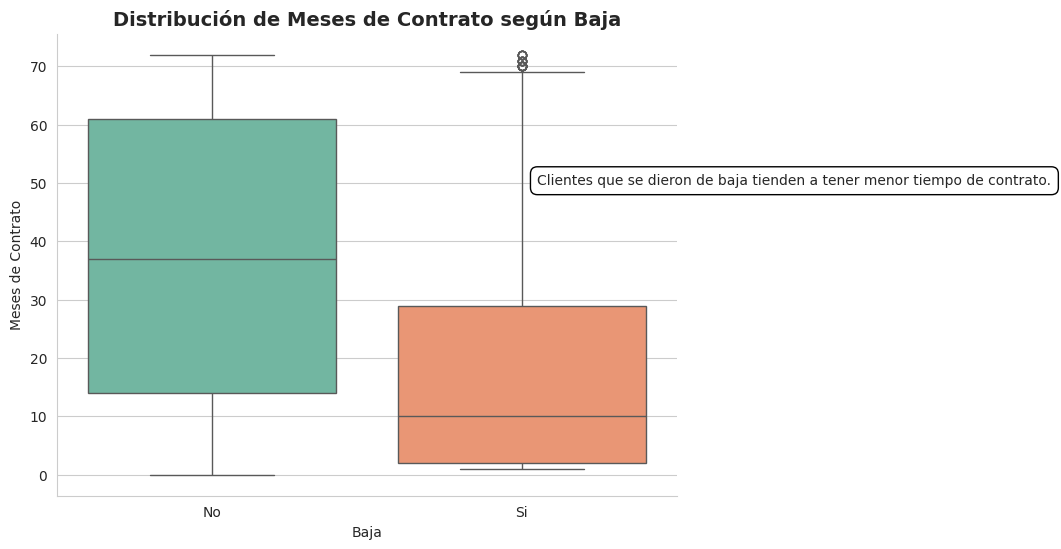

In [97]:

plt.figure(figsize=(8,6))
sns.boxplot(
    data=df_datos,
    x='Baja',
    y='Meses_Cliente',
    palette=['#66c2a5', '#fc8d62']
)
plt.title('Distribución de Meses de Contrato según Baja', fontsize=14, fontweight='bold')
plt.xlabel('Baja')
plt.ylabel('Meses de Contrato')
sns.despine(top=True, right=True)
plt.text(
    1.05, df_datos['Meses_Cliente'].max()*0.7,
    "Clientes que se dieron de baja tienden a tener menor tiempo de contrato.",
    fontsize=10, va='center', ha='left',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)
plt.show()

#📄Informe final

# 📊 Informe de Análisis de Evasión de Clientes - Telecom X

---

## 🔹 Introducción
El presente análisis tiene como objetivo estudiar la **evasión de clientes (Churn)** en Telecom X.  
Se busca identificar patrones y factores que influyen en la cancelación de servicios, para proponer estrategias que reduzcan la pérdida de clientes.

---

## 🔹 Limpieza y Tratamiento de Datos
**Pasos principales realizados:**
1. Importación y carga desde JSON/API.
2. Normalización de columnas anidadas (`customer`, `phone`, `internet`, `account`) con `pd.json_normalize()`.
3. Traducción de nombres de columnas al español.
4. Tratamiento de valores faltantes:
   - `Charges_Totales` nulos reemplazados por 0.
   - Verificación de otras columnas y ausencia de valores NaN significativos.
5. Corrección de valores especiales:
   - Reemplazo de "No phone service" y "No internet service" por "No".
6. Conversión de tipos:
   - Columnas numéricas (`Charges_Mensuales`, `Charges_Totales`, `Meses_Cliente`) convertidas a `float` o `int`.

---

## 🔹 Análisis Exploratorio de Datos (EDA)



### 1️⃣ Distribución general de la evasión

/tmp/ipython-input-2166110991.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_datos, x='Baja', palette=['#66c2a5','#fc8d62'], ax=axes[0])


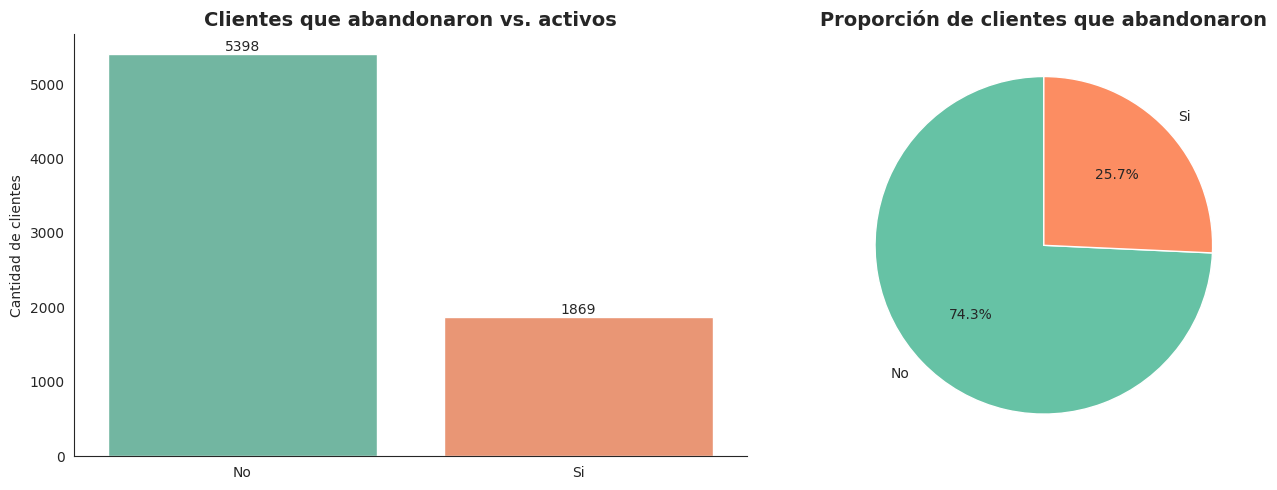

In [101]:
# Gráfico de barras y torta
sns.set_style("white")
fig, axes = plt.subplots(1,2, figsize=(14,5))

# Conteo de bajas
sns.countplot(data=df_datos, x='Baja', palette=['#66c2a5','#fc8d62'], ax=axes[0])
axes[0].set_title('Clientes que abandonaron vs. activos', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Cantidad de clientes')
axes[0].set_xlabel('')
# Valores sobre las barras
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)
sns.despine(ax=axes[0], top=True, right=True)

# Gráfico de torta
counts = df_datos['Baja'].value_counts()
axes[1].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['#66c2a5','#fc8d62'], startangle=90)
axes[1].set_title('Proporción de clientes que abandonaron', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


Mini-conclusión:
Menos del 30% de los clientes ha dejado la empresa (menos de 2.000 sobre más de 5.000), la mayoría permanece activa.

###2️⃣ Distribución según variables categóricas

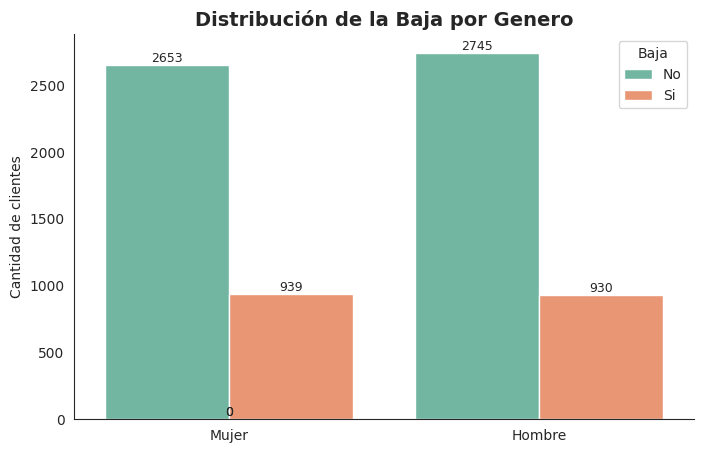

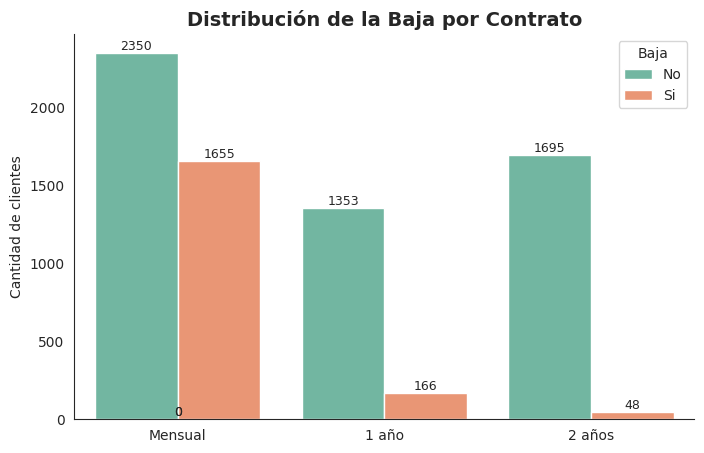

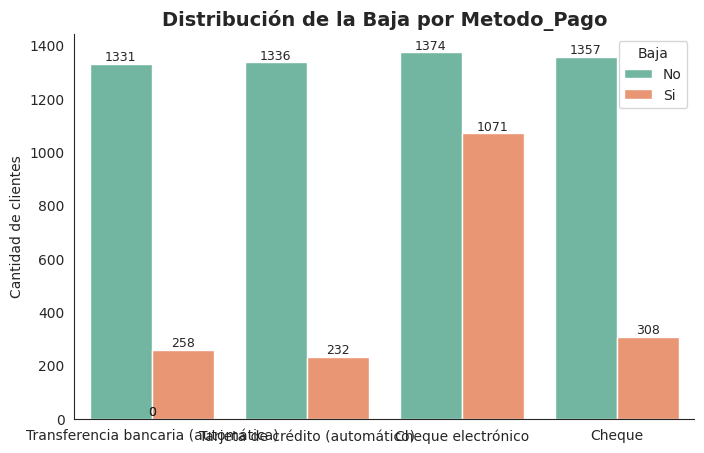

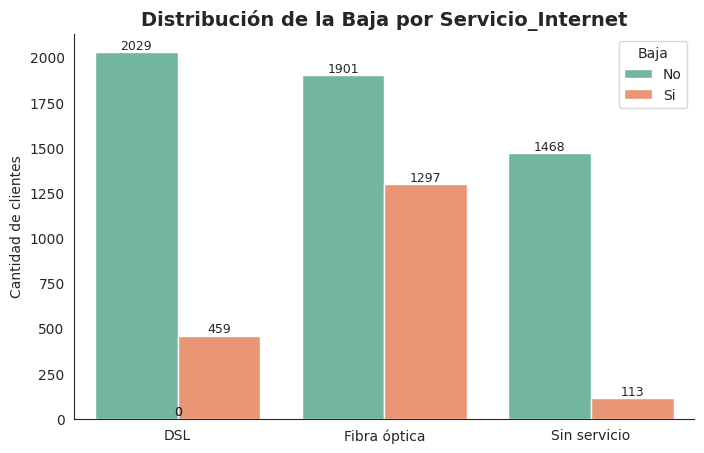

In [102]:
categoricas = ['Genero','Contrato','Metodo_Pago','Servicio_Internet']

for col in categoricas:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df_datos, x=col, hue='Baja', palette=['#66c2a5','#fc8d62'])
    plt.title(f'Distribución de la Baja por {col}', fontsize=14, fontweight='bold')
    plt.ylabel('Cantidad de clientes')
    plt.xlabel('')
    # Valores sobre las barras
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=9)
    sns.despine(top=True, right=True)
    plt.show()


Observaciones:

Género: No hay diferencia significativa.

Contrato: Los clientes con contrato mensual tienen mayor tendencia a abandonar.

Método de pago: Diferencias mínimas entre métodos.

Servicio de Internet: Fibra óptica muestra mayor tasa de baja.

###3️⃣ Distribución de variables numéricas


/tmp/ipython-input-252307701.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Baja', y=col, data=df_datos, palette=['#66c2a5','#fc8d62'])


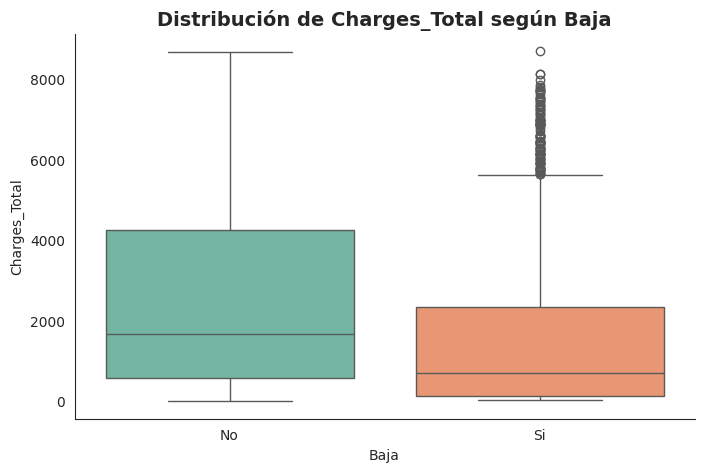

/tmp/ipython-input-252307701.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Baja', y=col, data=df_datos, palette=['#66c2a5','#fc8d62'])


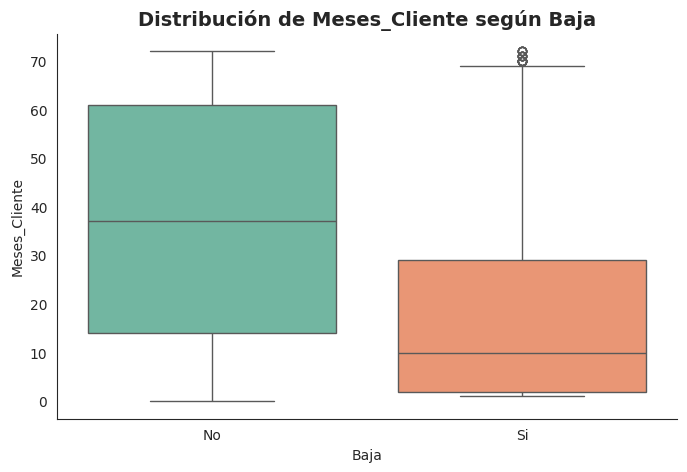

/tmp/ipython-input-252307701.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Baja', y=col, data=df_datos, palette=['#66c2a5','#fc8d62'])


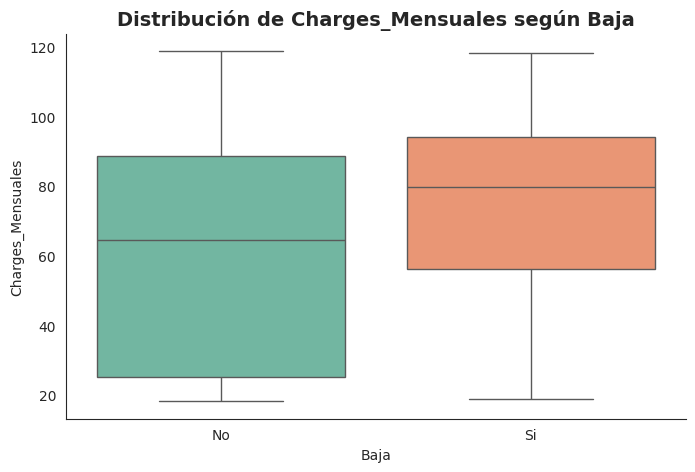

/tmp/ipython-input-252307701.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Baja', y=col, data=df_datos, palette=['#66c2a5','#fc8d62'])


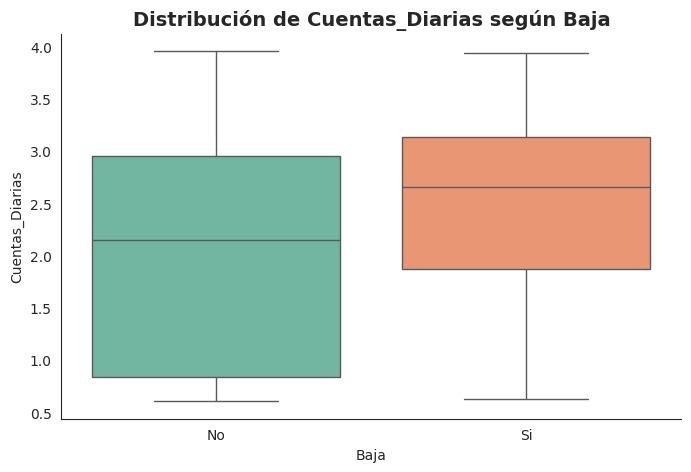

In [105]:
num_cols = ['Charges_Total','Meses_Cliente','Charges_Mensuales','Cuentas_Diarias']

for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Baja', y=col, data=df_datos, palette=['#66c2a5','#fc8d62'])
    plt.title(f'Distribución de {col} según Baja', fontsize=14, fontweight='bold')
    plt.ylabel(col)
    plt.xlabel('Baja')
    sns.despine(top=True, right=True)
    plt.show()

Insights:

Clientes que abandonan tienden a tener gastos mensuales y totales ligeramente mayores.

Contratos de menor duración se asocian con mayor probabilidad de baja.

Cuentas diarias más altas no muestran un patrón fuerte pero ayudan a segmentar clientes.

🔹 Conclusiones e Insights
Contratos mensuales y servicio de Fibra óptica presentan mayor riesgo de baja.

Género y método de pago no impactan significativamente la evasión.

Gastos totales y duración del contrato ofrecen señales moderadas sobre la probabilidad de abandono.

🔹 Recomendaciones
Incentivar contratos anuales con beneficios adicionales.

Implementar estrategias de retención para clientes con Fibra óptica.

Monitorear clientes con gasto elevado en los primeros meses.

Continuar recolectando y actualizando datos para mejorar predicción de Churn.

#EXTRA

In [107]:
# Crear copia para análisis de correlación
df_corr = df_datos.copy()

# Convertir 'Baja' a numérico
df_corr['Baja_num'] = df_corr['Baja'].map({'No': 0, 'Si': 1})

# Seleccionar variables numéricas relevantes
num_cols = ['Baja_num', 'Charges_Total', 'Meses_Cliente', 'Charges_Mensuales', 'Cuentas_Diarias']
df_num = df_corr[num_cols]


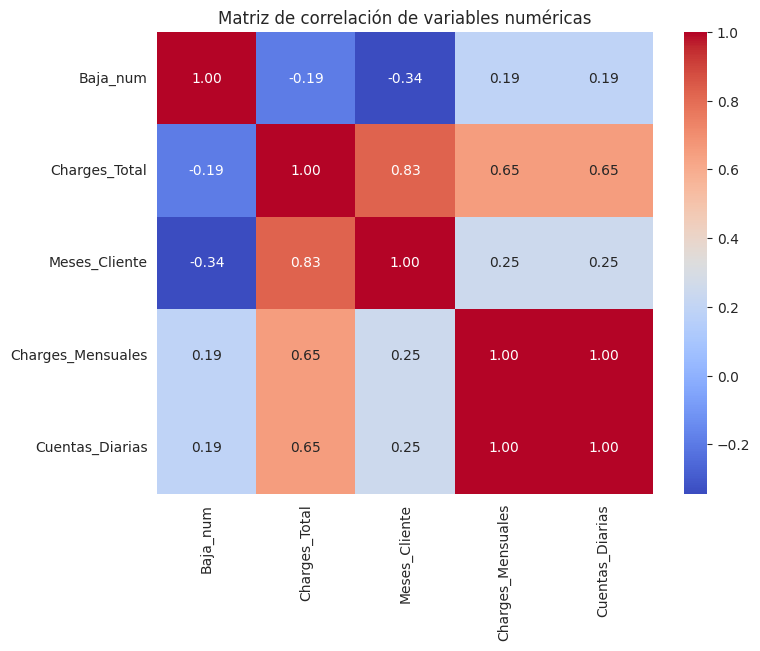

In [108]:
# Calcular correlación
corr_matrix = df_num.corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación de variables numéricas")
plt.show()


Valores cercanos a 1 o -1 indican fuerte correlación positiva o negativa.

Valores cercanos a 0 indican poca o ninguna relación.

/tmp/ipython-input-1027004581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Baja', y='Cuentas_Diarias', data=df_datos, palette=['#66c2a5','#fc8d62'])


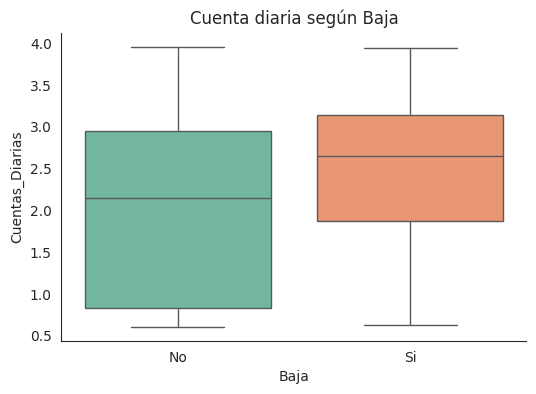

/tmp/ipython-input-1027004581.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Baja', y='Charges_Total', data=df_datos, palette=['#66c2a5','#fc8d62'])


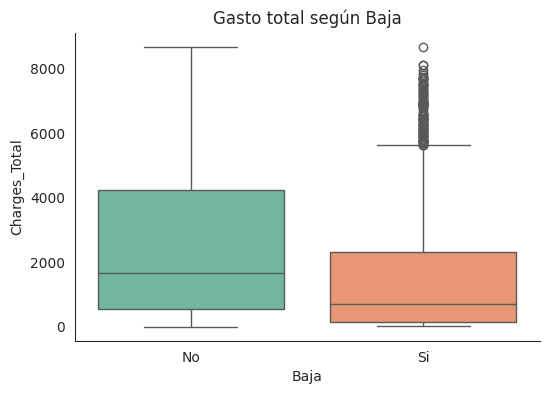

In [110]:
# Cuenta diaria vs Baja
plt.figure(figsize=(6,4))
sns.boxplot(x='Baja', y='Cuentas_Diarias', data=df_datos, palette=['#66c2a5','#fc8d62'])
plt.title("Cuenta diaria según Baja")
sns.despine(top=True, right=True)
plt.show()

# Charges Totales vs Baja
plt.figure(figsize=(6,4))
sns.boxplot(x='Baja', y='Charges_Total', data=df_datos, palette=['#66c2a5','#fc8d62'])
plt.title("Gasto total según Baja")
sns.despine(top=True, right=True)
plt.show()


Mini-conclusión:

Clientes con cuentas diarias más altas o gastos totales más elevados muestran mayor tendencia a abandonar.

Este insight puede ser útil para crear modelos predictivos de BAJA y estrategias de retención.